**SIMPLE LINEAR REGRESSION (SLR)**

***Step 1: Importing the libaries***

In [7]:
# step 1: Importing the libaries 

import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
import pandas as pd   #For importing the data files
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression   # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression

**Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)**

In [49]:
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values


In [9]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

**Step 3 : create a linear regression model**

In [12]:
model = LinearRegression() #Initialize the model

**Step 4 : Train the model using the dataset**

In [22]:
model.fit(X,Y)  # model learns the best-fit line by minimizing the error

LinearRegression()

**Step 5 : Get the values of slope and intercept from the trained model**

In [21]:
intercept = model.intercept_    #Intercept
coefficients = model.coef_      # Coefficient of the regression line
 
print("Intercept:",intercept)
print("Coefficients:",coefficients)

Intercept: 27.430065779800536
Coefficients: [4.96549814]


**Step 6 : Display the equation of the line**

In [24]:
print(f"Equation of the line: Y = {intercept:.2f}X + {coefficients[0]:.2f}")


Equation of the line: Y = 27.43X + 4.97


**Step 7 : Predict the values using the model**

In [25]:
Y_pred = model.predict(X) # TO predict salaries of the given experience values

**1 . MEAN SQUARED ERROR(MSE) - Measure average squared difference between actual and predicted values**

In [31]:
mse = mean_squared_error(Y,Y_pred)
print(f"Mean Absolute Error (MAE): {mse:.2f}")

Mean Absolute Error (MAE): 11.75


**2 . MEAN ABSOLUTE ERROR (MAE) - Measure average absolute difference between actual and predicted values**

In [32]:
mae = mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Errorc(MAE): {mae:.2f}")

Mean Absolute Errorc(MAE): 2.87


**3 . ROOT MEAN SQUARED ERROR (RMSE) - Measures standard deviation od residuals (errors)**

In [30]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE):{rmse:.2f}")


Root Mean Squared Error (RMSE):3.43


**4 . R-squared(R^2) - Represents how well the model fits the data(0 to 1,whaere 1 is best)**

In [33]:
r2 = r2_score(Y,Y_pred)
print(f"R-squared (R^2) : {r2:.2f}")

R-squared (R^2) : 0.95


**5 . Adjusted R-squared(R^2_adj) - Adjusted for the number of predictors,better for multiple regression**

In [34]:
n = len(Y) # Number of observations
p = 1 #Number of independent variables (Experience)
adj_r2 = 1 - ((1 - r2) * (n-1) / (n - p - 1))
print(f"Ajusted R-squared:{adj_r2:.2f}")

Ajusted R-squared:0.94


**Step 8 : Plot the actual data points**

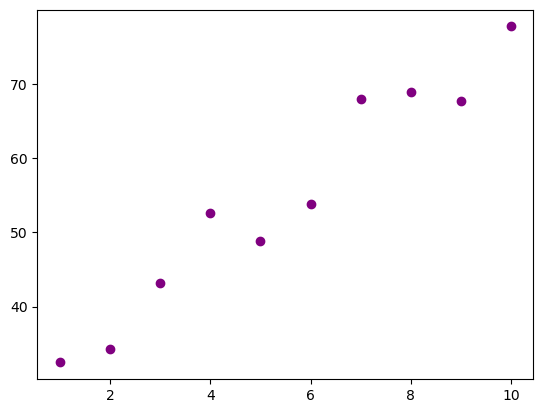

In [35]:
plt.scatter(X , Y , color = 'purple' , label = 'Actual Data') #scatter plot of the actual values

**Step 9 : Plot the Regression Line(Best fit line)**

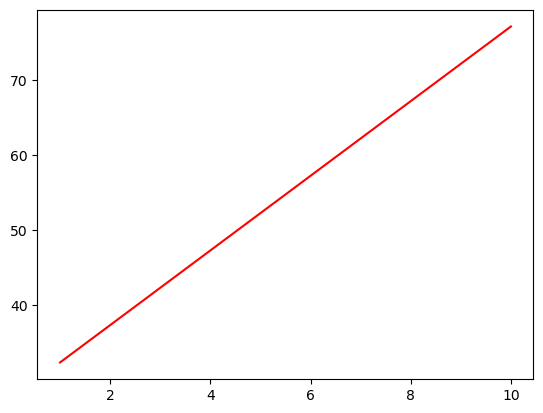

In [36]:
plt.plot(X,Y_pred,color='red',label='Best Fit Line')

**Step 10 : Add labels and legends**

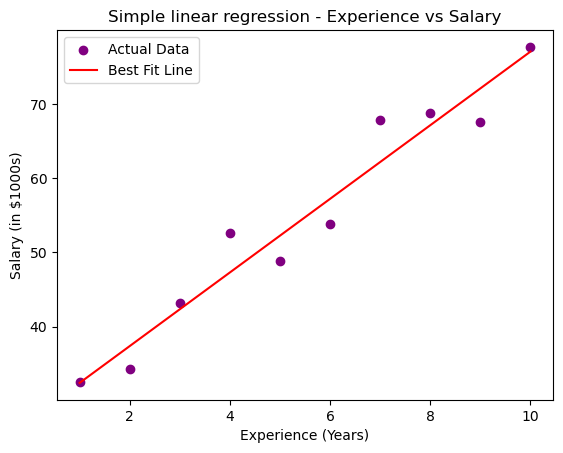

In [40]:
plt.scatter(X , Y , color = 'purple' , label = 'Actual Data') #scatter plot of the actual values

plt.plot(X,Y_pred,color='red',label='Best Fit Line')

plt.xlabel('Experience (Years)')  # Label for X-axis
plt.ylabel('Salary (in $1000s)')  #Label for Y-axis
plt.title('Simple linear regression - Experience vs Salary') #Title of the plot
plt.legend() #show legend


In [43]:
 #user can input eperience , and the model will predict salary
 while True:
    try:
        exp = float(input("\n Enter years of experience to predict salary (or -1 to exit):"))
        if exp == -1:
            break 
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"predicted salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number!")


 Enter years of experience to predict salary (or -1 to exit):5
predicted salary for 5.0 years of experience: $52.26K

 Enter years of experience to predict salary (or -1 to exit):-1


In [45]:
import statsmodels.api as sm  # For OLS Regression
from sklearn.preprocessing import PolynomialFeatures

 
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

X_poly = poly.fit_transform(X)  # Transforming X to polynomial features
 

In [46]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression

X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression

ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model

print("\nOLS Regression Summary:\n")

print(ols_model.summary())  # Display detailed statistical summary
 


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:12:56   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [48]:
#Step 12: Prediction of the features
#User can input experience, and the model will predict salary
while True:
    try:
        exp = float(input("\nEnter years of experience to predict salary (or -1 to exit):"))
        if exp <= -1:
            break
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number")   #modify this code in continuation to the above one


Enter years of experience to predict salary (or -1 to exit):10
Predicted salary for 10.0 years of experience: $77.09K

Enter years of experience to predict salary (or -1 to exit):6
Predicted salary for 6.0 years of experience: $57.22K

Enter years of experience to predict salary (or -1 to exit):-1
